In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
flow=pd.read_csv('flow.csv')
amplifica=pd.read_csv('amplifica.csv')
games=pd.read_csv('flow games.csv')
news=pd.read_csv('flow news.csv')
sports=pd.read_csv('flow sport.csv')
venus=pd.read_csv('venus.csv')
ciencia=pd.read_csv('ciencia sem fim.csv')

In [3]:
flow=flow.drop('mês-ano',axis=1)

In [4]:
flow['podcast']='flow'
amplifica['podcast']='amplifica'
games['podcast']='games'
news['podcast']='news'
sports['podcast']='sports'
venus['podcast']='venus'
ciencia['podcast']='ciencia'

In [5]:
all_df=pd.concat([flow,amplifica,games,news,sports,venus,ciencia])

In [6]:
all_df['Type']=all_df['Duration'].map(lambda x:'Short' if x<60 else 'Video' if x<(50*60) else 'Live')

In [7]:
all_df

,Duration,Title,Published_date,Views,Likes,Comments,Type,podcast
0,23.0,Naldo ajudou o Bruno Mars muito esse ano,2024-12-26,1240,169,5,Short,flow
1,52.0,O inacreditável “médico” de Magé,2024-12-26,2649,555,3,Short,flow
2,10.0,Todo mundo tem um amigo que se empolga quando ...,2024-12-26,10888,641,3,Short,flow
3,29.0,A famosa voz do Anderson Silva,2024-12-25,47866,6822,38,Short,flow
4,52.0,Boni fala sobre os fundamentos pra um projeto ...,2024-12-25,4927,396,7,Short,flow
...,...,...,...,...,...,...,...,...
922,8379.0,ALBERTO DELL`ISOLA - Ciência Sem Fim #05,2021-09-09,241757,18711,550,Live,ciencia
923,9953.0,LITO SOUSA [AVIÕES E MÚSICAS] - Ciência Sem Fi...,2021-09-04,968171,58523,1449,Live,ciencia
924,9550.0,MARCOS PALHARES [FUTURO ASTRONAUTA] - Ciência ...,2021-09-02,138885,15396,575,Live,ciencia
925,7382.0,DOUGLAS GALANTE [ASTROBIOLOGO] - Ciência Sem F...,2021-08-28,429020,30746,1027,Live,ciencia


In [8]:
all_df['Engajamento/s']=(all_df['Views']+all_df['Likes']*1.5+all_df['Comments']*2)/all_df['Duration']

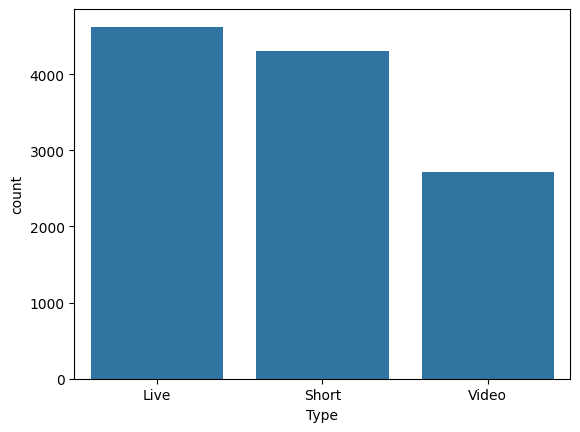

In [9]:
ax = sns.barplot(all_df['Type'].value_counts())

In [10]:
overview=pd.DataFrame(all_df[['podcast','Type']].value_counts()).reset_index()

In [11]:
views=all_df.groupby(['Type','podcast'])[['Views','Duration']].sum().reset_index()

In [12]:
views['views/s']=views['Views']/views['Duration']

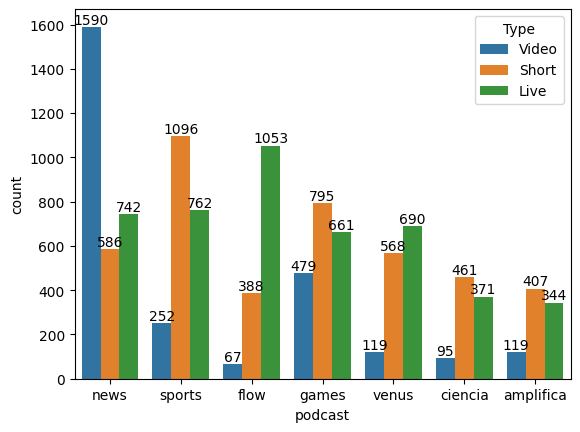

In [13]:
ax = sns.barplot(x='podcast',y='count',hue='Type', data=overview)
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);

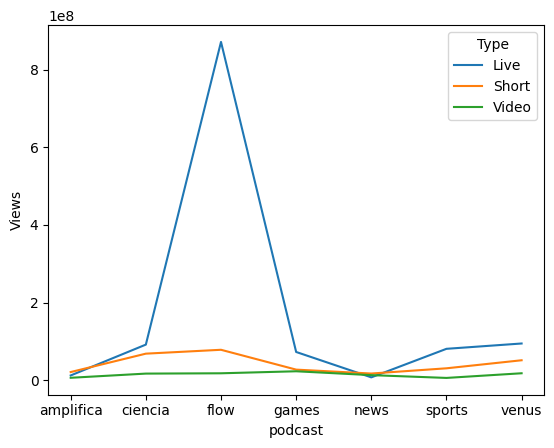

In [14]:
ax=sns.lineplot(x='podcast',y='Views',hue='Type', data=views)

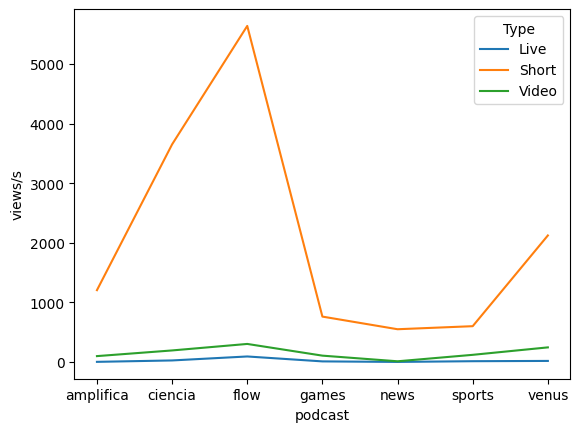

In [15]:
ax=sns.lineplot(x='podcast',y='views/s',hue='Type', data=views)

In [16]:
views3=views[views['Type']!='Short']

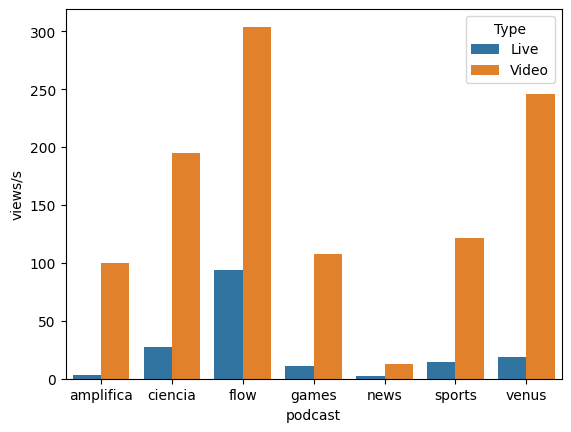

In [17]:
ax=sns.barplot(x='podcast',y='views/s',hue='Type', data=views3)

In [18]:
views2=views[views['podcast']!='flow']

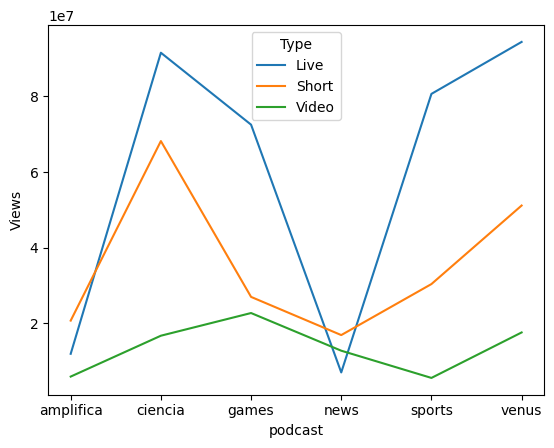

In [19]:
ax=sns.lineplot(x='podcast',y='Views',hue='Type', data=views2)

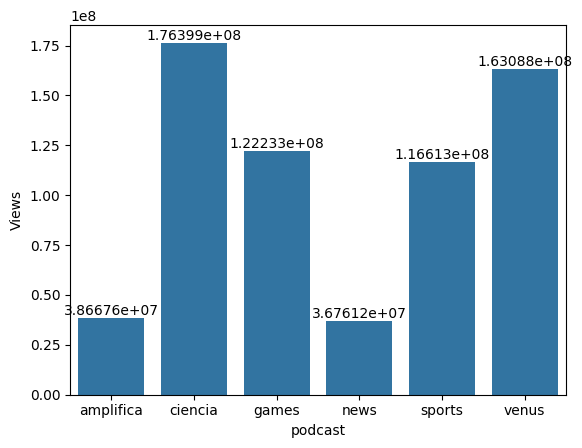

In [20]:
ax=sns.barplot(views2.groupby(['podcast'])['Views'].sum())
ax.bar_label(ax.containers[0], fontsize=10);

In [21]:
overview_eng=all_df[['podcast','Type','Engajamento/s']].groupby(['podcast','Type']).mean().reset_index()
overview_eng_live=overview_eng[overview_eng['Type']=='Live']

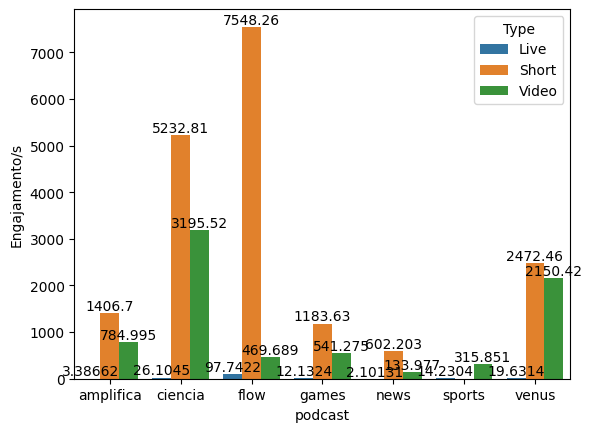

In [22]:
ax = sns.barplot(x='podcast',y='Engajamento/s',hue='Type', data=overview_eng)
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);

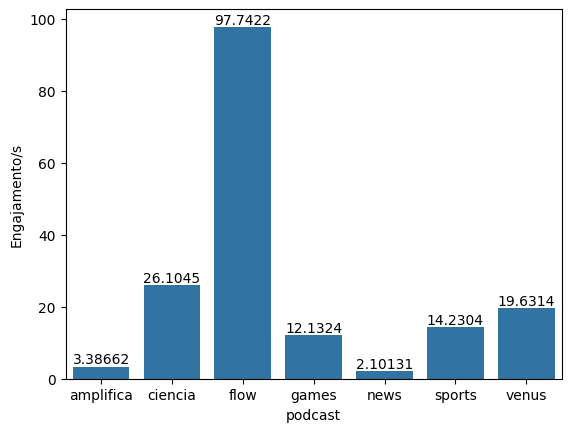

In [23]:
ax = sns.barplot(x='podcast',y='Engajamento/s', data=overview_eng_live)
ax.bar_label(ax.containers[0], fontsize=10);

In [24]:
all_df.reset_index(drop=True,inplace=True)

In [25]:
all_df=all_df.sort_values('Published_date').reset_index(drop=True)

In [26]:
all_df[all_df['Views']==0]

,Duration,Title,Published_date,Views,Likes,Comments,Type,podcast,Engajamento/s
5001,0.0,Transmissão ao vivo de Flow News,2023-09-14,0,0,0,Short,news,NaN
7542,11960.0,COBERTURA SHOW ALOK AO VIVO - BSB 6.4,2024-04-21,0,2198,37,Live,venus,0.281856
7544,13593.0,REACT SHOW ALOK AO VIVO - BSB 6.4,2024-04-21,0,738,5,Live,amplifica,0.082175
7549,12034.0,SHOW ALOK AO VIVO - BSB 6.4,2024-04-21,0,37499,1184,Live,flow,4.870907
11206,0.0,SACANI RESPONDE [URANO E NETUNO] - Ciência Sem...,2024-12-06,0,0,0,Short,ciencia,NaN


In [27]:
all_df=all_df[all_df['Views']!=0].reset_index(drop=True)

In [28]:
all_df[all_df['Duration']==0]

,Duration,Title,Published_date,Views,Likes,Comments,Type,podcast,Engajamento/s
11635,0.0,DAVY & CAIO vs MULIS & MATHEUS - EA FSC 25 GAM...,2024-12-27,3985,521,0,Short,sports,inf


In [29]:
all_df=all_df[all_df['Duration']!=0].reset_index(drop=True)

In [30]:
all_df

,Duration,Title,Published_date,Views,Likes,Comments,Type,podcast,Engajamento/s
0,8073.0,Flow Podcast #01 – MONARK E IGOR,2018-09-30,1119371,69488,4476,Live,flow,152.676205
1,7926.0,Flow Podcast #02 - DREZZY,2018-10-06,186930,11039,346,Live,flow,25.760850
2,7564.0,Flow Podcast #03 – ESPECIAL BGS,2018-10-14,63167,3971,133,Live,flow,9.173652
3,10155.0,Flow Podcast #04 – PRIMO PANDA E ANDRÉ MEISTER,2018-10-21,44529,2115,71,Live,flow,4.711324
4,7786.0,Flow Podcast #05 - RAPHAËL LIMA (IDEIAS RADICAIS),2018-10-28,431313,29000,2128,Live,flow,61.529540
...,...,...,...,...,...,...,...,...,...
11634,85.0,Cláudia Leitte muda a letra da música,2024-12-27,207,47,7,Video,news,3.429412
11635,93.0,CRISTIANO RONALDO é muito DETERMINADO! #cr7 #c...,2024-12-27,269,98,0,Video,sports,4.473118
11636,34.0,O GALO VAI SER CAMPEÃO DA SULA EM 2025?? 🤔 O A...,2024-12-27,1103,136,3,Short,sports,38.617647
11637,32.0,TER CORAGEM É ISSO...,2024-12-27,1407,92,0,Short,venus,48.281250


In [31]:
all_df['Published_date']=pd.to_datetime(all_df['Published_date'])

In [32]:
all_df['dia_semana'] = all_df['Published_date'].map(lambda x: x.weekday())
all_df['ano'] = all_df['Published_date'].dt.year
all_df['mês'] = all_df['Published_date'].dt.month
all_df['dia'] = all_df['Published_date'].dt.day

<Axes: >

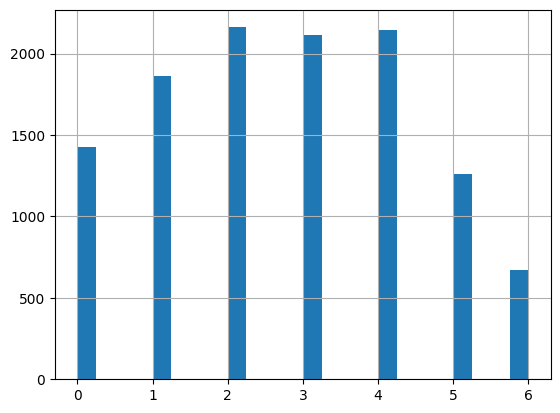

In [33]:
all_df['dia_semana'].hist(bins=24)

<Axes: >

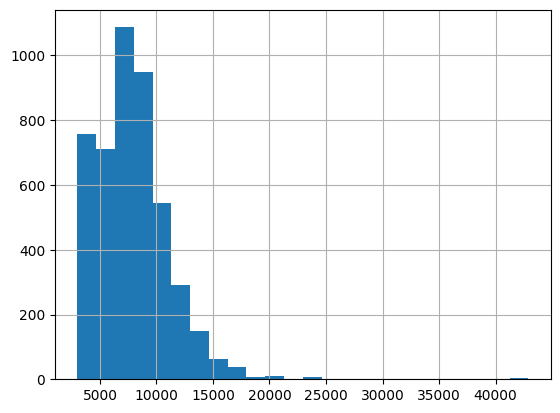

In [35]:
all_df[all_df['Type']=='Live']['Duration'].hist(bins=24)

<Axes: >

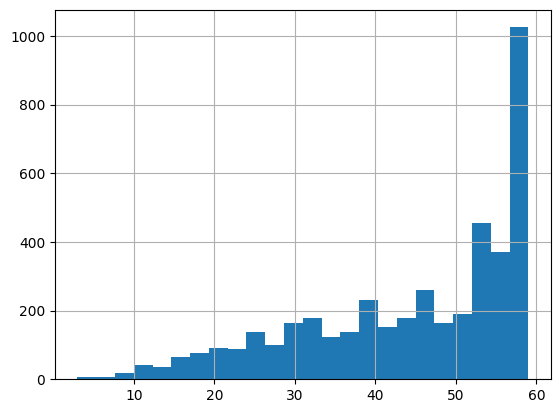

In [36]:
all_df[all_df['Type']=='Short']['Duration'].hist(bins=24)

<Axes: >

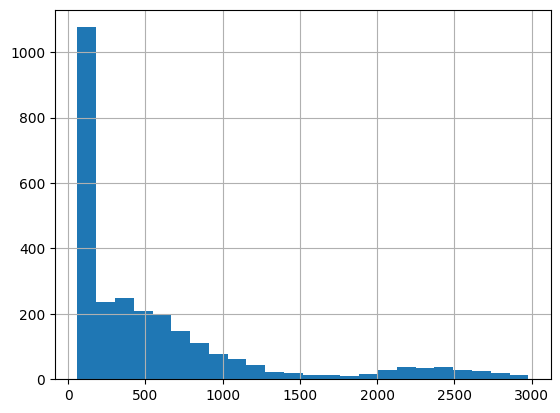

In [37]:
all_df[all_df['Type']=='Video']['Duration'].hist(bins=24)

<Axes: >

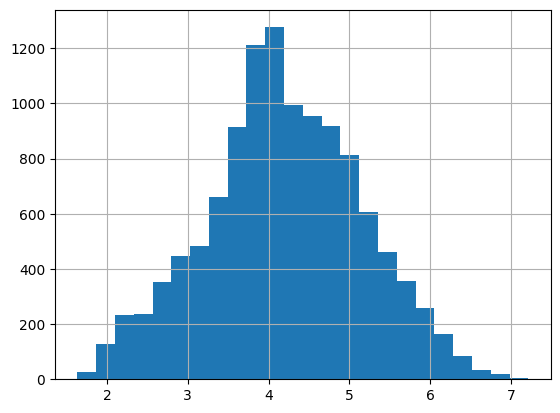

In [38]:
np.log10(all_df['Views']).hist(bins=24)

<Axes: >

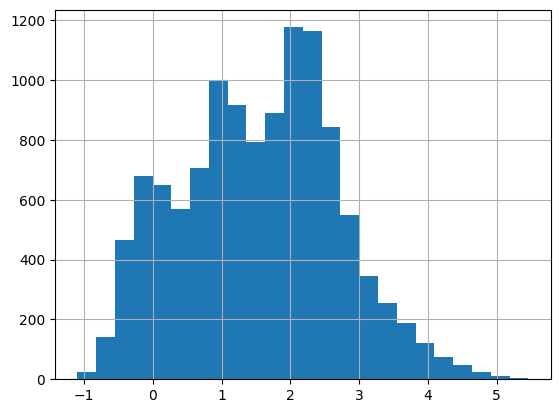

In [39]:
np.log10(all_df['Engajamento/s']).hist(bins=24)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

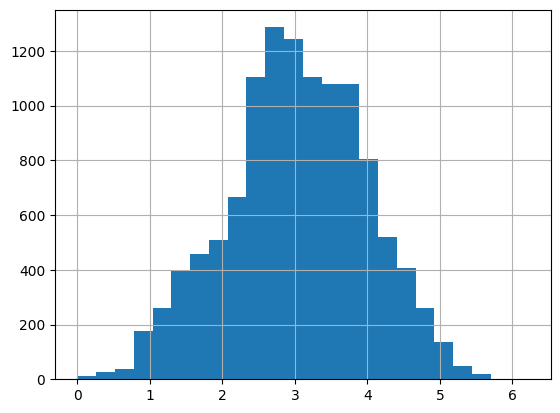

In [40]:
np.log10(all_df['Likes']).replace(-np.inf, 0).hist(bins=24)

<Axes: >

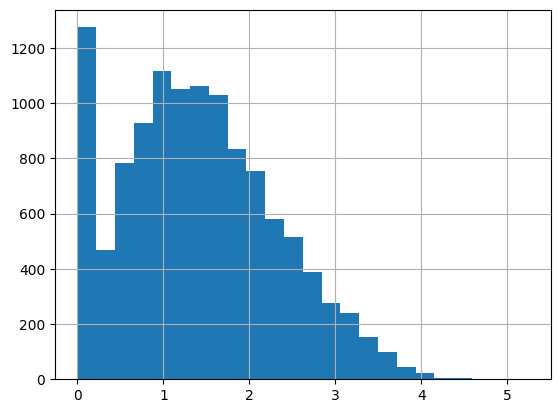

In [41]:
np.log10(all_df['Comments']).replace(-np.inf, 0).hist(bins=24)

In [42]:
type_dum = pd.get_dummies(all_df['Type'], prefix ='type',dtype=int)
podcast_dum = pd.get_dummies(all_df['podcast'], prefix ='podcast',dtype=int)
dia_dum = pd.get_dummies(all_df['dia_semana'], prefix ='dia',dtype=int)

In [43]:
final_df=pd.concat([all_df[['Duration','Views','Likes','Comments','Engajamento/s','ano','mês','dia']].reset_index(drop=True),
                           type_dum, podcast_dum, dia_dum], axis=1)

In [44]:
alt_all_df=all_df[(all_df['ano']>2022)]

In [45]:
alt_type_dum = pd.get_dummies(alt_all_df['Type'], prefix ='type',dtype=int).reset_index()
alt_podcast_dum = pd.get_dummies(alt_all_df['podcast'], prefix ='podcast',dtype=int).reset_index()
alt_dia_dum = pd.get_dummies(alt_all_df['dia_semana'], prefix ='dia',dtype=int).reset_index()

In [46]:
alt_final_df=pd.concat([alt_all_df[['Duration','Views','Likes','Comments','Engajamento/s','ano','mês','dia']].reset_index(drop=True),
                           alt_type_dum, alt_podcast_dum, alt_dia_dum], axis=1)

In [47]:
cor_tbl_df = final_df[['Views','Duration','Likes','Comments','Engajamento/s','ano','mês','dia','type_Live','type_Short','type_Video','podcast_amplifica','podcast_ciencia','podcast_flow','podcast_games','podcast_news','podcast_sports','podcast_venus','dia_0','dia_1','dia_2','dia_3','dia_4','dia_5','dia_6']]
sort_n = cor_tbl_df.corr().sort_values('Views', ascending=False).index
cor_tbl_df.corr()[sort_n].iloc[0]

Views                1.000000
Likes                0.901527
Comments             0.647272
podcast_flow         0.380028
Engajamento/s        0.343341
Duration             0.277866
type_Live            0.201797
podcast_ciencia      0.029513
dia_5                0.026984
dia_6                0.015059
dia_3                0.008685
dia_1                0.005748
dia_4               -0.002703
dia_2               -0.008254
dia                 -0.014524
podcast_venus       -0.014905
dia_0               -0.039947
mês                 -0.040735
podcast_amplifica   -0.052784
podcast_games       -0.066633
podcast_sports      -0.077461
type_Short          -0.106858
type_Video          -0.111430
podcast_news        -0.143621
ano                 -0.283657
Name: Views, dtype: float64

In [48]:
new_final_df=final_df[['Views','Duration','Likes','Comments','Engajamento/s','mês','dia','type_Live','type_Short','type_Video','podcast_amplifica','podcast_ciencia','podcast_flow','podcast_games','podcast_news','podcast_sports','podcast_venus','dia_0','dia_1','dia_2','dia_3','dia_4','dia_5','dia_6']]

In [49]:
final_df

,Duration,Views,Likes,Comments,Engajamento/s,ano,mês,dia,type_Live,type_Short,...,podcast_news,podcast_sports,podcast_venus,dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6
0,8073.0,1119371,69488,4476,152.676205,2018,9,30,1,0,...,0,0,0,0,0,0,0,0,0,1
1,7926.0,186930,11039,346,25.760850,2018,10,6,1,0,...,0,0,0,0,0,0,0,0,1,0
2,7564.0,63167,3971,133,9.173652,2018,10,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,10155.0,44529,2115,71,4.711324,2018,10,21,1,0,...,0,0,0,0,0,0,0,0,0,1
4,7786.0,431313,29000,2128,61.529540,2018,10,28,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11634,85.0,207,47,7,3.429412,2024,12,27,0,0,...,1,0,0,0,0,0,0,1,0,0
11635,93.0,269,98,0,4.473118,2024,12,27,0,0,...,0,1,0,0,0,0,0,1,0,0
11636,34.0,1103,136,3,38.617647,2024,12,27,0,1,...,0,1,0,0,0,0,0,1,0,0
11637,32.0,1407,92,0,48.281250,2024,12,27,0,1,...,0,0,1,0,0,0,0,1,0,0


In [50]:
def metrics(model,x_test,y_test):
    predictions = model.predict(x_test)
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("RMSE:", root_mean_squared_error(y_test, predictions))
    print("R²:", r2_score(y_test, predictions))

In [51]:
y_view=final_df['Views']
y_likes=final_df['Likes']
y_comments=final_df['Comments']
y_eng=final_df['Engajamento/s']       
x=final_df.drop(['Views','Likes','Comments','Engajamento/s'],axis=1)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y_view, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [53]:
metrics(rf,x_test,y_test)

MAE: 130074.5443055077
RMSE: 422690.9785583898
R²: 0.24639270273375646


In [54]:
rf.predict(x_test)[:5]

array([67139.30296987, 86992.69475464, 28737.0494764 ,  1084.62120449,
       69818.67276325])

In [55]:
y_test[:5]

3717    64605
6465    32237
7061     2088
5720      431
2342    36109
Name: Views, dtype: int64

In [56]:
all_df.iloc[3717]

Duration                                              6652.0
Title             COLETIVA DE IMPRENSA FMS 3 @FightMusicShow
Published_date                           2023-06-30 00:00:00
Views                                                  64605
Likes                                                   2977
Comments                                                 113
Type                                                    Live
podcast                                               sports
Engajamento/s                                      10.417393
dia_semana                                                 4
ano                                                     2023
mês                                                        6
dia                                                       30
Name: 3717, dtype: object

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y_likes, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [58]:
metrics(rf,x_test,y_test)

MAE: 7925.982118270654
RMSE: 24484.12511617096
R²: 0.23203365605076254


In [59]:
rf.predict(x_test)[:5]

array([3711.29477608, 5283.25434911, 1498.78263775,   96.32133732,
       4376.3873186 ])

In [60]:
y_test[:5]

3717    2977
6465    1590
7061     110
5720      21
2342    3083
Name: Likes, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y_comments, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [62]:
metrics(rf,x_test,y_test)

MAE: 290.6750721966607
RMSE: 1476.306114311421
R²: 0.20628407678456895


In [63]:
rf.predict(x_test)[:5]

array([43.10905505, 75.06246219, 92.00526415,  8.4670307 , 70.00403893])

In [64]:
y_test[:5]

3717    113
6465     19
7061      0
5720      3
2342     18
Name: Comments, dtype: int64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y_eng, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [66]:
metrics(rf,x_test,y_test)

MAE: 1244.9533054602125
RMSE: 6700.17573549152
R²: 0.09447912139785719


In [67]:
rf.predict(x_test)[:5]

array([11.97868079, 12.64818209,  5.79020702,  2.50735092, 12.01884603])

In [68]:
y_test[:5]

3717    10.417393
6465     4.059023
7061     0.304459
5720     1.454969
2342     6.034562
Name: Engajamento/s, dtype: float64

Testei TimeSeriesSplit e os valores foram ainda piores

In [69]:
y_view=new_final_df['Views']     
x=new_final_df.drop(['Views','Likes','Comments','Engajamento/s'],axis=1)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y_view, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [71]:
metrics(rf,x_test,y_test)

MAE: 133157.5344424203
RMSE: 432452.9663574492
R²: 0.21118184351380276


In [72]:
y_view=alt_final_df['Views']    
x=alt_final_df.drop(['Views','Likes','Comments','Engajamento/s'],axis=1)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y_view, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [74]:
metrics(rf,x_test,y_test)

MAE: 77795.50551582995
RMSE: 248311.0256134875
R²: 0.13248069951505337


In [75]:
y_scaler = StandardScaler()
x_scaler = StandardScaler()

In [76]:
y_view=final_df['Views']      
x=final_df.drop(['Views','Likes','Comments','Engajamento/s'],axis=1)
y_view=y_scaler.fit_transform(pd.DataFrame(y_view))
x=x_scaler.fit_transform(x)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y_view, test_size=0.25, random_state=10)
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,n_estimators=500) #Fiz um RandomizedSearchCV pra achar esses parâmetros
rf.fit(x_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [78]:
metrics(rf,x_test,y_test)

MAE: 0.2537916724556555
RMSE: 0.8273468016448632
R²: 0.24869296973240718


In [80]:
y = y_view  
X = x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8054 - val_loss: 0.6036
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1488 - val_loss: 0.5825
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7530 - val_loss: 0.5716
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8432 - val_loss: 0.5670
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6365 - val_loss: 0.5586
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8126 - val_loss: 0.5545
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8974 - val_loss: 0.5500
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7367 - val_loss: 0.5494
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7777 - val_loss: 0.5476
Epoch 10/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7937 - val_loss: 0.5469
Epoch 11/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8008 - val_loss: 0.5488
Epoch 12/100
146/146 ━━━━━━━━━━━━━━━━━━━━

In [83]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE: 0.257303352782102
R²: 0.23986558246657974


Conclusão: Base de dados obtida não é suficiente para prever quantidade de views através de Florestas Aleatórias ou Redes Neuras